In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
df = pd.read_csv('CreditScoring_final.csv')

In [3]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,5,owner,18,29,married,0,fixed,45,142,6000,3000,450,1678
1,ok,12,owner,36,56,married,0,fixed,75,205,5500,1950,275,300
2,ok,2,parents,36,19,married,0,fixed,35,162,4000,100,400,570
3,ok,10,owner,48,50,married,0,freelance,45,128,11500,0,500,1195
4,ok,2,parents,36,34,married,0,fixed,60,400,9800,0,900,1316


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     3117 non-null   object
 1   seniority  3118 non-null   int64 
 2   home       3114 non-null   object
 3   time       3118 non-null   int64 
 4   age        3118 non-null   int64 
 5   marital    3118 non-null   object
 6   records    3118 non-null   int64 
 7   job        3117 non-null   object
 8   expenses   3118 non-null   int64 
 9   income     3118 non-null   int64 
 10  assets     3118 non-null   int64 
 11  debt       3118 non-null   int64 
 12  amount     3118 non-null   int64 
 13  price      3118 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 341.2+ KB


In [5]:
df.describe()

,seniority,time,age,records,expenses,income,assets,debt,amount,price
count,3118.000000,3118.000000,3118.000000,3118.000000,3118.000000,3.118000e+03,3.118000e+03,3.118000e+03,3118.000000,3118.000000
mean,8.123477,46.233483,37.121552,0.179282,55.735087,7.698538e+05,1.224097e+06,4.493422e+05,1038.024054,1462.111610
std,8.235690,14.743905,11.032674,0.383649,19.499835,8.740952e+06,1.097330e+07,6.686779e+06,476.781416,640.337326
min,0.000000,6.000000,18.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,0.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1114.000000
50%,5.000000,48.000000,36.000000,0.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,0.000000,73.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1685.500000
max,47.000000,72.000000,68.000000,1.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [6]:
df.replace(99999999, np.nan, inplace=True)
df= df[df.status.notna()]

In [7]:
print(df.isna().sum())

status        0
seniority     0
home          4
time          0
age           0
marital       0
records       0
job           1
expenses      0
income       24
assets       38
debt         14
amount        0
price         0
dtype: int64


In [8]:
df.status = df.status.map({'ok': 0, 'default': 1})
df = df.dropna()


In [9]:
print(df.isna().sum())

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64


In [10]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,5,owner,18,29,married,0,fixed,45,142.0,6000.0,3000.0,450,1678
1,0,12,owner,36,56,married,0,fixed,75,205.0,5500.0,1950.0,275,300
2,0,2,parents,36,19,married,0,fixed,35,162.0,4000.0,100.0,400,570
3,0,10,owner,48,50,married,0,freelance,45,128.0,11500.0,0.0,500,1195
4,0,2,parents,36,34,married,0,fixed,60,400.0,9800.0,0.0,900,1316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,0,20,other,60,39,married,0,fixed,60,119.0,0.0,0.0,1300,1639
3114,1,2,priv,60,53,married,0,fixed,75,85.0,7000.0,0.0,1050,1172
3115,0,8,owner,48,52,married,0,fixed,60,105.0,3500.0,0.0,1000,1887
3116,0,2,owner,36,30,married,0,fixed,45,350.0,4000.0,0.0,800,1800


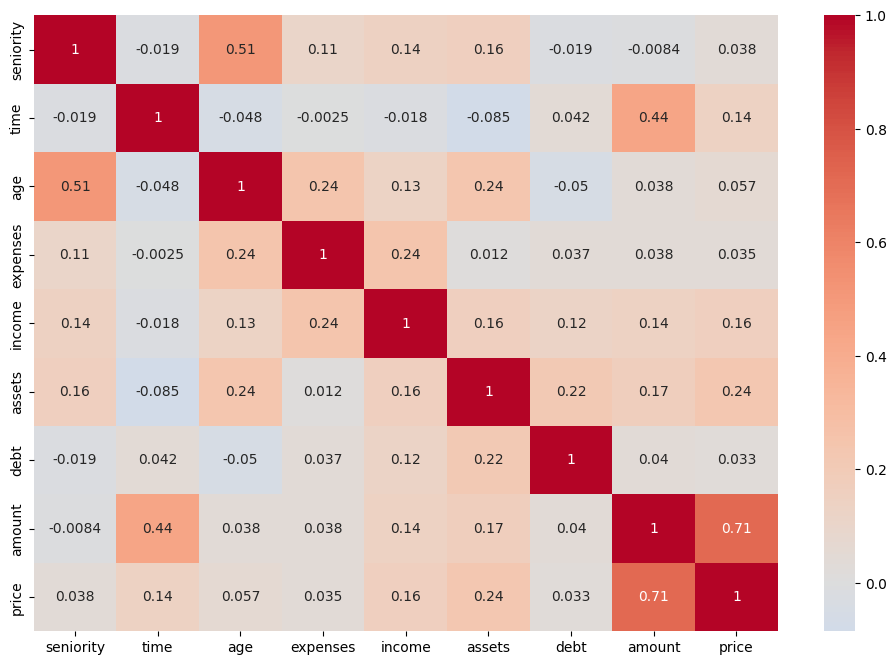

In [11]:
numeric_cols = ['seniority', 'time', 'age', 'expenses', 'income', 
                   'assets', 'debt', 'amount', 'price']
correlation_matrix = df[numeric_cols].corr()
    
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [12]:
df['income_stability'] = df['seniority'] * df['income']
df['weighted_disposable_income'] = (df['income'] - df['expenses'] - df['debt']) * df['seniority']
df['income_expenses_ratio'] = df['income'] / (df['expenses'] + 1)
df['disposable_income'] = df['income'] - df['expenses'] - df['debt']
df['assets_to_debt'] = df['assets'] / (df['debt'] + 1)
df['expense_to_income'] = df['expenses'] / (df['income'] + 1)
df['assets_to_debt'] = df['assets'] / (df['debt'] + 1)
df['monthly_payment'] = df['amount'] / df['time']
df['can_afford'] = (df['disposable_income'] >= df['monthly_payment']).astype(int)

In [13]:
def create_preprocessing_pipeline():

    numeric_features = [
        'seniority', 'time', 'age', 'expenses', 'income', 
        'assets', 'debt', 'amount', 'price', 
        'weighted_disposable_income', 'can_afford',
        'income_stability', 'income_expenses_ratio',
        'expense_to_income', 'assets_to_debt', 'monthly_payment'
    ]
    categorical_features = ['home', 'marital', 'records', 'job']

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    return preprocessor

In [14]:

X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns='status'), 
    df['status'], 
    test_size=0.3, 
    random_state=42, 
    stratify=df['status'])


In [15]:
preprocessor=create_preprocessing_pipeline()
gradient = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,        
        learning_rate=0.1,       
        max_depth=3,             
        random_state=42
    ))
])

In [16]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
cv_scores = cross_val_score(gradient, X_train, y_train, 
                             cv=cv, scoring='f1')
print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", cv_scores.mean())
print("CV F1 score std:", cv_scores.std())

gradient.fit(X_train, y_train)

y_pred = gradient.predict(X_val)
print("\nValidation set performance:")
print(classification_report(y_val, y_pred))

Cross-validation F1 scores: [0.58706468 0.5631068  0.63888889 0.56       0.53773585]
Mean CV F1 score: 0.5773592421357826
CV F1 score std: 0.034509655669675614

Validation set performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       661
           1       0.73      0.54      0.62       257

    accuracy                           0.81       918
   macro avg       0.78      0.73      0.75       918
weighted avg       0.81      0.81      0.81       918



<Figure size 1200x600 with 0 Axes>

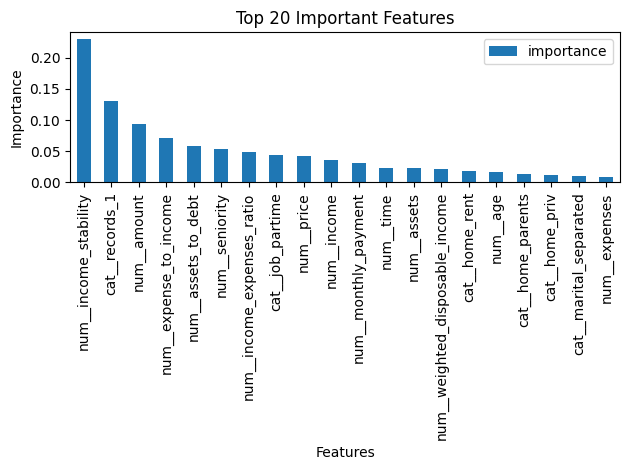

In [17]:
if hasattr(gradient.named_steps['classifier'], 'feature_importances_'):
    feature_importance = pd.DataFrame(
        gradient.named_steps['classifier'].feature_importances_,
        index=gradient.named_steps['preprocessor'].get_feature_names_out(),
        columns=['importance']
    ).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    feature_importance.head(20).plot(kind='bar')
    plt.title('Top 20 Important Features')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

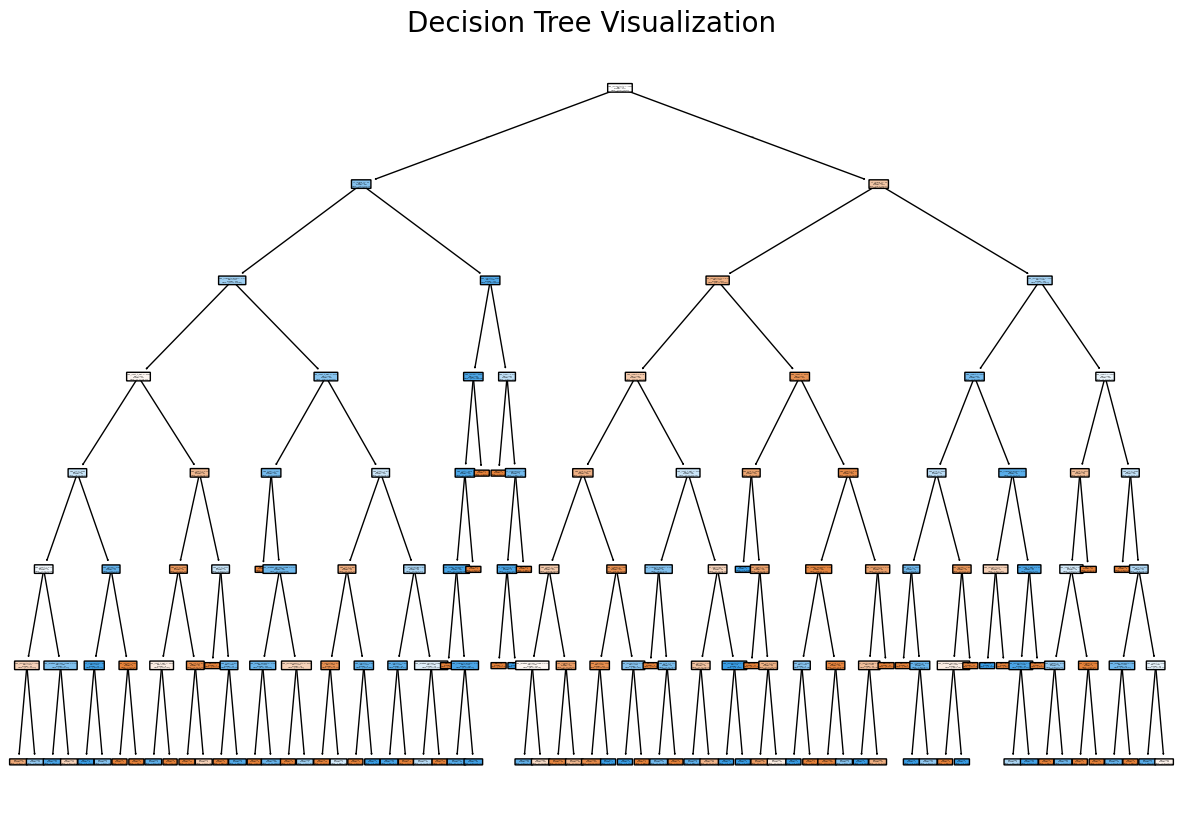

In [18]:
model = DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=42)

pipeline = Pipeline([
    ('preprocessor', create_preprocessing_pipeline()),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(pipeline.named_steps['classifier'],
          filled=True,
          feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out(),
          class_names=["Class 0", "Class 1"],
          rounded=True)

plt.title('Decision Tree Visualization', fontsize=20)
plt.show()
